Importing Libraries

In [288]:
import nltk
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from io import StringIO
import csv
import unicodedata
import string
import plotly
import plotly.express as px
import plot_likert
from sklearn.model_selection import train_test_split
%matplotlib inline

In [289]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [290]:
df = pd.read_csv(r"D:\DataAnalysis\Social_Survey_Questionnaire_for_Beneficiaries_0.csv")

In [291]:
type(df)

pandas.core.frame.DataFrame

In [292]:
df

ObjectID                              GlobalID  Logo_TUDresden  \
0           1  b8330d48-b014-43e9-83ee-65e2eef11c4f             NaN   
1           2  bb5a8756-5fa8-425b-b48e-590943d89688             NaN   
2           3  4330fe39-a7c1-4c52-adf5-80b1ea153095             NaN   
3           4  a65873e1-686d-4f03-973d-a4620eb9798b             NaN   
4           5  d9d192e3-225a-4e27-b439-a5b881a0e26e             NaN   
..        ...                                   ...             ...   
145       146  0b3b2aad-707c-46c2-ac09-4d38e14e1d3d             NaN   
146       147  de6da6cc-c6e1-4114-adf0-14a03a50354d             NaN   
147       148  1dd0393e-d55a-4c1c-8052-8c678c177fd3             NaN   
148       149  49eec3a2-09ae-42f2-b670-b526478ffd0b             NaN   
149       150  c6b480fe-5961-44c3-b781-bb7d7bb5a1ad             NaN   

     Logo_IOER  Name of Researcher: Nathan Namatama  \
0          NaN                                  NaN   
1          NaN                                  NaN   
2          NaN                                  NaN   
3          NaN                                  NaN   
4          NaN                                  NaN   
..         ...                                  ...   
145        NaN                                  NaN   
146        NaN                                  NaN   
147        NaN                                  NaN   
148        NaN                                  NaN   
149        NaN                                  NaN   

     Email: n.namatama@ioer.de  Logo  \
0                          NaN   NaN   
1                          NaN   NaN   
2                          NaN   NaN   
3                          NaN   NaN   
4                          NaN   NaN   
..                         ...   ...   
145                        NaN   NaN   
146                        NaN   NaN   
147                        NaN   NaN   
148                        NaN   NaN   
149                        NaN   NaN   

     The social survey questionnaire is meant to gather information on three things:  \
0                                                  NaN                                 
1                                                  NaN                                 
2                                                  NaN                                 
3                                                  NaN                                 
4                                                  NaN                                 
..                                                 ...                                 
145                                                NaN                                 
146                                                NaN                                 
147                                                NaN                                 
148                                                NaN                                 
149                                                NaN                                 

     •\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.  \
0                                                  NaN                                                                                       
1                                                  NaN                                                                                       
2                                                  NaN                                                                                       
3                                                  NaN                                                                                       
4                                                  NaN                                                                                       
..                                                 ...                                               

In [293]:
df.shape

(150, 120)

Missing Values

In [294]:
df.isnull().sum()

ObjectID                                 0
GlobalID                                 0
Logo_TUDresden                         150
Logo_IOER                              150
Name of Researcher: Nathan Namatama    150
                                      ... 
Specify:.7                             150
Specify:.8                              60
Specify:.9                             126
x                                        0
y                                        0
Length: 120, dtype: int64

Dropping all the Missing Values

In [295]:
df.isnull().sum().sort_values(ascending=False)

Logo_IOER                              150
Logo_TUDresden                         150
Email: n.namatama@ioer.de              150
Name of Researcher: Nathan Namatama    150
Logo                                   150
                                      ... 
Editor                                   0
CreationDate                             0
Creator                                  0
x                                        0
y                                        0
Length: 120, dtype: int64

In [296]:
#df.dropna(inplace=True)

Renaming the Columns and Deleting Columnns

In [297]:
df1=df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,117,118,119]], axis = 1)

In [298]:
df1

ObjectID 6. Ward Name                       7. Sub Project Name  \
0           1  Isamba ward                        Isamba coperatives   
1           2  Isamba ward  Misenga cooperative multipurpose society   
2           3      Isamba                          Ninge Cooperative   
3           4  Isamba ward                    Twikatene copperatives   
4           5  Isamba ward                      Changwena women club   
..        ...          ...                                       ...   
145       146         Yeta                                       NaN   
146       147        Yeta                                    Biochar   
147       148         Yeta                                   Biochar   
148       149         Yeta                                  B iochar   
149       150    Yeta ward          Piggery, fishponds and gardening   

                                 8. Type of Livelihood  \
0                                         Goat rearing   
1                 Goat rearing, Gardening, Fruit trees   
2                     Goat Rearing, Agricuture-cassava   
3    Goat rearing and Fish farming and garden of ve...   
4                     Chicken rearing ablnd an orchard   
..                                                 ...   
145                                            Biochar   
146                                          Gardening   
147                                          Gardening   
148                                        Gardenning    
149               Fish ponds and piggery and gerdening   

             9. Size (Lima)      12. Name of main project  \
0            8to12Lima_Size                   TRALARD_LNM   
1    Greaterthan16Lima_Size                   TRALARD_LNM   
2    Greaterthan16Lima_Size                   TRALARD_LNM   
3    Greaterthan16Lima_Size                   TRALARD_LNM   
4        Lessthan4Lima_Size                   TRALARD_LNM   
..                      ...                           ...   
145                     NaN  EbA_CENTRAL_MUCHINGA_LUAPULA   
146      Lessthan4Lima_Size                   PIN_WESTERN   
147      Lessthan4Lima_Size                   PIN_WESTERN   
148          8to12Lima_Size                   PIN_WESTERN   
149      Lessthan4Lima_Size                SCReBS_WESTERN   

    13. Do you represent other beneficiaries?  \
0                                         yes   
1                                         yes   
2                                         yes   
3                                         yes   
4                                         NaN   
..                                        ...   
145                                       NaN   
146                                        no   
147                                        no   
148                                        no   
149                                       yes   

    14. How many beneficiaries do you represent?  \
0                       Greaterthan40People_Many   
1                       Greaterthan40People_Many   
2                       Greaterthan40People_Many   
3                       Greaterthan40People_Many   
4                              20to30People_Many   
..                                           ...   
145                                          NaN   
146                                          NaN   
147                                          NaN   
148                                          NaN   
149                            10to20People_Many   

    45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?  \
0                                         Agree_Likert                                                                                    
1                                Strongly_Agree_Likert                                                                                    
2                             Strongly_Disagree_Likert                         

In [299]:
df1.columns

Index(['ObjectID', '6. Ward Name', '7. Sub Project Name',
       '8. Type of Livelihood', '9. Size (Lima)', '12. Name of main project',
       '13. Do you represent other beneficiaries?',
       '14. How many beneficiaries do you represent?',
       '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?',
       '46. What reasons can you give for your answer above?',
       '47. Do you think some cultural practices can be changed?',
       '48. Do you consider cultural aspects when formulating the livelihood projects?',
       '49. What reasons can you give for your answer above?',
       '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?',
       '51. Do you think there is need to measure indicators when managing landscapes?',
       '52. How is your connection to nature like?',
       '53. What reasons can you give for your answer above?',
       '54. How

In [300]:
df2=df1.rename(columns= {'1. Do you agree to take part in the above study?': 'Part_study',
                        '2. Do you know that your participation is voluntary and you are free to withdraw anytime?':'Participation_Voluntary', 
                        '3. Do you give permission to the data that emerges to be used by the researchers only in an anonymised form?': 'Anonymised_Form', 
                        '5. Date': 'Date', 
                        '6. Ward Name': 'Ward_Name', 
                        '7. Sub Project Name': 'Sub_Project_name', 
                        '8. Type of Livelihood': 'Livelihood', 
                        '9. Size (Lima)': 'Size', 
                        '12. Name of main project': 'Name_Main_Project',
                        '13. Do you represent other beneficiaries?': 'Representing_Others',
                        '14. How many beneficiaries do you represent?': 'Number_Beneficiaries',
                        '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?': 'Cultural_Practices_Hinder', 
                        '46. What reasons can you give for your answer above?': 'Cultural_Practices_Hinder_Reason', 
                        '47. Do you think some cultural practices can be changed?': 'Cultural_Practices_Changed', 
                        '48. Do you consider cultural aspects when formulating the livelihood projects?': 'Cultural_Aspects_Considered',
                        '49. What reasons can you give for your answer above?': 'Cultural_Aspects_Considered_Reasons', 
                        '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
                        '51. Do you think there is need to measure indicators when managing landscapes?': 'Measure_Indicators', 
                        '52. How is your connection to nature like?': 'Connection_Nature', 
                        '53. What reasons can you give for your answer above?': 'Connection_Nature_Reasons',
                       '54. How long have you worked on this livelihood project?': 'Livelihood_Project',
                       '55. Does your livelihood depend on the natural resources for a living?': 'Livilihood_Depenedent',
                       '56. Do you consider changing your livelihood strategy in future?': 'Change_Livelihood',
                       '57. Do you think it is easier to change your livelihood practices?': 'Change_Livelihood_Easy',
                       '58. Are you able to give reasons for your answer above in your ability to change your livelihood practices?': 'Change_Livelihood_Easy_Reasons',
                       '59. Have the ecosystem services reduced from the inception of the project in your ward?': 'Ecosystem_Services_Reduced',
                       '60. Has the deforestation increased in the ward?': 'Deforestaion_Increased',
                       '61. Do you think protected areas are a hindrance to your livelihoods?': 'Protected_Areas_Hinderarnce_Livelihood',
                       '62. Are there new livelihood projects that you think of that have never been implemented?': 'New_Livelihood_Projects',
                       '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?': 'Subprojects_Sustainability_Contribution',
                       '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
                       '65. What reasons can you give for your answer above?': 'Contributor_Landscape_Transformation_Reasons',
                       '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood',
                       '67. What reasons can you give for your answer above?': 'Landscape_Depeneded_Livelihood_Reasons',
                       'Specify:.4': 'Purpose_Landscape_Specific',
                       'Specify:.5': 'Connection_Nature_Specific',
                       'Specify:.6': 'Contributor_Landscape_Transformation_Specific',
                       'Specify:.7': 'Landscape_Depended_Livelihood_Specific'})

In [301]:
df2

ObjectID    Ward_Name                          Sub_Project_name  \
0           1  Isamba ward                        Isamba coperatives   
1           2  Isamba ward  Misenga cooperative multipurpose society   
2           3      Isamba                          Ninge Cooperative   
3           4  Isamba ward                    Twikatene copperatives   
4           5  Isamba ward                      Changwena women club   
..        ...          ...                                       ...   
145       146         Yeta                                       NaN   
146       147        Yeta                                    Biochar   
147       148         Yeta                                   Biochar   
148       149         Yeta                                  B iochar   
149       150    Yeta ward          Piggery, fishponds and gardening   

                                            Livelihood  \
0                                         Goat rearing   
1                 Goat rearing, Gardening, Fruit trees   
2                     Goat Rearing, Agricuture-cassava   
3    Goat rearing and Fish farming and garden of ve...   
4                     Chicken rearing ablnd an orchard   
..                                                 ...   
145                                            Biochar   
146                                          Gardening   
147                                          Gardening   
148                                        Gardenning    
149               Fish ponds and piggery and gerdening   

                       Size             Name_Main_Project Representing_Others  \
0            8to12Lima_Size                   TRALARD_LNM                 yes   
1    Greaterthan16Lima_Size                   TRALARD_LNM                 yes   
2    Greaterthan16Lima_Size                   TRALARD_LNM                 yes   
3    Greaterthan16Lima_Size                   TRALARD_LNM                 yes   
4        Lessthan4Lima_Size                   TRALARD_LNM                 NaN   
..                      ...                           ...                 ...   
145                     NaN  EbA_CENTRAL_MUCHINGA_LUAPULA                 NaN   
146      Lessthan4Lima_Size                   PIN_WESTERN                  no   
147      Lessthan4Lima_Size                   PIN_WESTERN                  no   
148          8to12Lima_Size                   PIN_WESTERN                  no   
149      Lessthan4Lima_Size                SCReBS_WESTERN                 yes   

         Number_Beneficiaries Cultural_Practices_Hinder  \
0    Greaterthan40People_Many              Agree_Likert   
1    Greaterthan40People_Many     Strongly_Agree_Likert   
2    Greaterthan40People_Many  Strongly_Disagree_Likert   
3    Greaterthan40People_Many     Strongly_Agree_Likert   
4           20to30People_Many  Strongly_Disagree_Likert   
..                        ...                       ...   
145                       NaN                       NaN   
146                       NaN  Strongly_Disagree_Likert   
147                       NaN  Strongly_Disagree_Likert   
148                       NaN  Strongly_Disagree_Likert   
149         10to20People_Many  Strongly_Disagree_Likert   

                      Cultural_Practices_Hinder_Reason  ...  \
0          It has never happed before in his life time  ...   
1    There is need to harvest tree when they have f...  ...   
2    There are no customary practices that hinder s...  ...   
3    There are rotations made on the land when cult...  ...   
4                                     There is nothing  ...   
..                                                 ...  ...   
145                                                NaN  ...   
146                                   There is nothing  ...   
147                                    There is nthing  ...   
148                                   There is nothing  ...   
149                                   There is nothing  ...   

    

In [302]:
df3=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,9,12,13,15,16,17,21,27,28,29,30,31,32,33,34]], axis = 1)

In [303]:
df3

Cultural_Practices_Hinder Cultural_Practices_Changed  \
0                Agree_Likert           Undecided_Likert   
1       Strongly_Agree_Likert      Strongly_Agree_Likert   
2    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
3       Strongly_Agree_Likert   Strongly_Disagree_Likert   
4    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
..                        ...                        ...   
145                       NaN                        NaN   
146  Strongly_Disagree_Likert   Strongly_Disagree_Likert   
147  Strongly_Disagree_Likert   Strongly_Disagree_Likert   
148  Strongly_Disagree_Likert   Strongly_Disagree_Likert   
149  Strongly_Disagree_Likert   Strongly_Disagree_Likert   

    Cultural_Aspects_Considered     Measure_Indicators  \
0      Strongly_Disagree_Likert  Strongly_Agree_Likert   
1         Strongly_Agree_Likert  Strongly_Agree_Likert   
2      Strongly_Disagree_Likert  Strongly_Agree_Likert   
3         Strongly_Agree_Likert  Strongly_Agree_Likert   
4      Strongly_Disagree_Likert           Agree_Likert   
..                          ...                    ...   
145                         NaN                    NaN   
146                Agree_Likert  Strongly_Agree_Likert   
147    Strongly_Disagree_Likert  Strongly_Agree_Likert   
148    Strongly_Disagree_Likert  Strongly_Agree_Likert   
149    Strongly_Disagree_Likert  Strongly_Agree_Likert   

        Livilihood_Depenedent         Change_Livelihood  \
0    Strongly_Disagree_Likert              Agree_Likert   
1       Strongly_Agree_Likert     Strongly_Agree_Likert   
2       Strongly_Agree_Likert  Strongly_Disagree_Likert   
3    Strongly_Disagree_Likert           Disagree_Likert   
4       Strongly_Agree_Likert     Strongly_Agree_Likert   
..                        ...                       ...   
145                       NaN                       NaN   
146  Strongly_Disagree_Likert     Strongly_Agree_Likert   
147     Strongly_Agree_Likert     Strongly_Agree_Likert   
148  Strongly_Disagree_Likert     Strongly_Agree_Likert   
149  Strongly_Disagree_Likert                       NaN   

       Change_Livelihood_Easy Ecosystem_Services_Reduced  \
0       Strongly_Agree_Likert      Strongly_Agree_Likert   
1       Strongly_Agree_Likert      Strongly_Agree_Likert   
2                Agree_Likert      Strongly_Agree_Likert   
3    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
4       Strongly_Agree_Likert      Strongly_Agree_Likert   
..                        ...                        ...   
145                       NaN                        NaN   
146     Strongly_Agree_Likert      Strongly_Agree_Likert   
147     Strongly_Agree_Likert      Strongly_Agree_Likert   
148     Strongly_Agree_Likert      Strongly_Agree_Likert   
149     Strongly_Agree_Likert      Strongly_Agree_Likert   

       Deforestaion_Increased Protected_Areas_Hinderarnce_Livelihood  \
0       Strongly_Agree_Likert                  Strongly_Agree_Likert   
1       Strongly_Agree_Likert               Strongly_Disagree_Likert   
2       Strongly_Agree_Likert               Strongly_Disagree_Likert   
3    Strongly_Disagree_Likert               Strongly_Disagree_Likert   
4       Strongly_Agree_Likert               Strongly_Disagree_Likert   
..                        ...                                    ...   
145                       NaN                                    NaN   
146     Strongly_Agree_Likert               Strongly_Disagree_Likert   
147     Strongly_Agree_Likert               Strongly_Disagree_Likert   
148     Strongly_Agree_Likert                                    NaN   
149     Strongly_Agree_Likert               Strongly_Disagree_Likert   

      New_Livelihood_Projects Subprojects_Sustainability_Contribution  
0    Strongly_Disagree_Likert                Strongly_Disagree_Likert  
1       Strongly_Agree_Likert                   Strongly_Agree_Likert  
2    Strongly_Disagree_Likert                Strongly_Disagree_Likert  
3  

In [304]:
all_counts = df3.apply(pd.Series.value_counts)

In [305]:
all_counts

Cultural_Practices_Hinder  \
Agree_Likert                                     22   
Disagree_Likert                                  21   
Strongly_Agree_Likert                            21   
Strongly_Disagree_Likert                         69   
Undecided_Likert                                  4   

                          Cultural_Practices_Changed  \
Agree_Likert                                      29   
Disagree_Likert                                   22   
Strongly_Agree_Likert                             29   
Strongly_Disagree_Likert                          41   
Undecided_Likert                                   9   

                          Cultural_Aspects_Considered  Measure_Indicators  \
Agree_Likert                                       19                  28   
Disagree_Likert                                    20                   4   
Strongly_Agree_Likert                              22                  81   
Strongly_Disagree_Likert                           66                  22   
Undecided_Likert                                    7                   7   

                          Livilihood_Depenedent  Change_Livelihood  \
Agree_Likert                                 35                 39   
Disagree_Likert                              25                 37   
Strongly_Agree_Likert                        44                 38   
Strongly_Disagree_Likert                     32                 20   
Undecided_Likert                              4                  5   

                          Change_Livelihood_Easy  Ecosystem_Services_Reduced  \
Agree_Likert                                  46                          39   
Disagree_Likert                               24                          13   
Strongly_Agree_Likert                         49                          72   
Strongly_Disagree_Likert                      18                          16   
Undecided_Likert                               4                           3   

                          Deforestaion_Increased  \
Agree_Likert                                  16   
Disagree_Likert                               32   
Strongly_Agree_Likert                         72   
Strongly_Disagree_Likert                      17   
Undecided_Likert                               1   

                          Protected_Areas_Hinderarnce_Livelihood  \
Agree_Likert                                                14.0   
Disagree_Likert                                             19.0   
Strongly_Agree_Likert                                       15.0   
Strongly_Disagree_Likert                                    83.0   
Undecided_Likert                                             NaN   

                          New_Livelihood_Projects  \
Agree_Likert                                   58   
Disagree_Likert                                15   
Strongly_Agree_Likert                          36   
Strongly_Disagree_Likert                       19   
Undecided_Likert                               10   

                          Subprojects_Sustainability_Contribution  
Agree_Likert                                                   37  
Disagree_Likert                                                 4  
Strongly_Agree_Likert                                          81  
Strongly_Disagree_Likert                                       15  
Undecided_Likert                                                3

In [306]:
all_counts1 = all_counts.head().T

In [307]:
all_counts1

Agree_Likert  Disagree_Likert  \
Cultural_Practices_Hinder                        22.0             21.0   
Cultural_Practices_Changed                       29.0             22.0   
Cultural_Aspects_Considered                      19.0             20.0   
Measure_Indicators                               28.0              4.0   
Livilihood_Depenedent                            35.0             25.0   
Change_Livelihood                                39.0             37.0   
Change_Livelihood_Easy                           46.0             24.0   
Ecosystem_Services_Reduced                       39.0             13.0   
Deforestaion_Increased                           16.0             32.0   
Protected_Areas_Hinderarnce_Livelihood           14.0             19.0   
New_Livelihood_Projects                          58.0             15.0   
Subprojects_Sustainability_Contribution          37.0              4.0   

                                         Strongly_Agree_Likert  \
Cultural_Practices_Hinder                                 21.0   
Cultural_Practices_Changed                                29.0   
Cultural_Aspects_Considered                               22.0   
Measure_Indicators                                        81.0   
Livilihood_Depenedent                                     44.0   
Change_Livelihood                                         38.0   
Change_Livelihood_Easy                                    49.0   
Ecosystem_Services_Reduced                                72.0   
Deforestaion_Increased                                    72.0   
Protected_Areas_Hinderarnce_Livelihood                    15.0   
New_Livelihood_Projects                                   36.0   
Subprojects_Sustainability_Contribution                   81.0   

                                         Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    69.0   
Cultural_Practices_Changed                                   41.0   
Cultural_Aspects_Considered                                  66.0   
Measure_Indicators                                           22.0   
Livilihood_Depenedent                                        32.0   
Change_Livelihood                                            20.0   
Change_Livelihood_Easy                                       18.0   
Ecosystem_Services_Reduced                                   16.0   
Deforestaion_Increased                                       17.0   
Protected_Areas_Hinderarnce_Livelihood                       83.0   
New_Livelihood_Projects                                      19.0   
Subprojects_Sustainability_Contribution                      15.0   

                                         Undecided_Likert  
Cultural_Practices_Hinder                             4.0  
Cultural_Practices_Changed                            9.0  
Cultural_Aspects_Considered                           7.0  
Measure_Indicators                                    7.0  
Livilihood_Depenedent                                 4.0  
Change_Livelihood                                     5.0  
Change_Livelihood_Easy                                4.0  
Ecosystem_Services_Reduced                            3.0  
Deforestaion_Increased                                1.0  
Protected_Areas_Hinderarnce_Livelihood                NaN  
New_Livelihood_Projects                              10.0  
Subprojects_Sustainability_Contribution               3.0

In [308]:
all_counts2 = all_counts1.iloc[:, [3, 1, 4, 0, 2]]

In [309]:
all_counts2 

Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    69.0   
Cultural_Practices_Changed                                   41.0   
Cultural_Aspects_Considered                                  66.0   
Measure_Indicators                                           22.0   
Livilihood_Depenedent                                        32.0   
Change_Livelihood                                            20.0   
Change_Livelihood_Easy                                       18.0   
Ecosystem_Services_Reduced                                   16.0   
Deforestaion_Increased                                       17.0   
Protected_Areas_Hinderarnce_Livelihood                       83.0   
New_Livelihood_Projects                                      19.0   
Subprojects_Sustainability_Contribution                      15.0   

                                         Disagree_Likert  Undecided_Likert  \
Cultural_Practices_Hinder                           21.0               4.0   
Cultural_Practices_Changed                          22.0               9.0   
Cultural_Aspects_Considered                         20.0               7.0   
Measure_Indicators                                   4.0               7.0   
Livilihood_Depenedent                               25.0               4.0   
Change_Livelihood                                   37.0               5.0   
Change_Livelihood_Easy                              24.0               4.0   
Ecosystem_Services_Reduced                          13.0               3.0   
Deforestaion_Increased                              32.0               1.0   
Protected_Areas_Hinderarnce_Livelihood              19.0               NaN   
New_Livelihood_Projects                             15.0              10.0   
Subprojects_Sustainability_Contribution              4.0               3.0   

                                         Agree_Likert  Strongly_Agree_Likert  
Cultural_Practices_Hinder                        22.0                   21.0  
Cultural_Practices_Changed                       29.0                   29.0  
Cultural_Aspects_Considered                      19.0                   22.0  
Measure_Indicators                               28.0                   81.0  
Livilihood_Depenedent                            35.0                   44.0  
Change_Livelihood                                39.0                   38.0  
Change_Livelihood_Easy                           46.0                   49.0  
Ecosystem_Services_Reduced                       39.0                   72.0  
Deforestaion_Increased                           16.0                   72.0  
Protected_Areas_Hinderarnce_Livelihood           14.0                   15.0  
New_Livelihood_Projects                          58.0                   36.0  
Subprojects_Sustainability_Contribution          37.0                   81.0

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


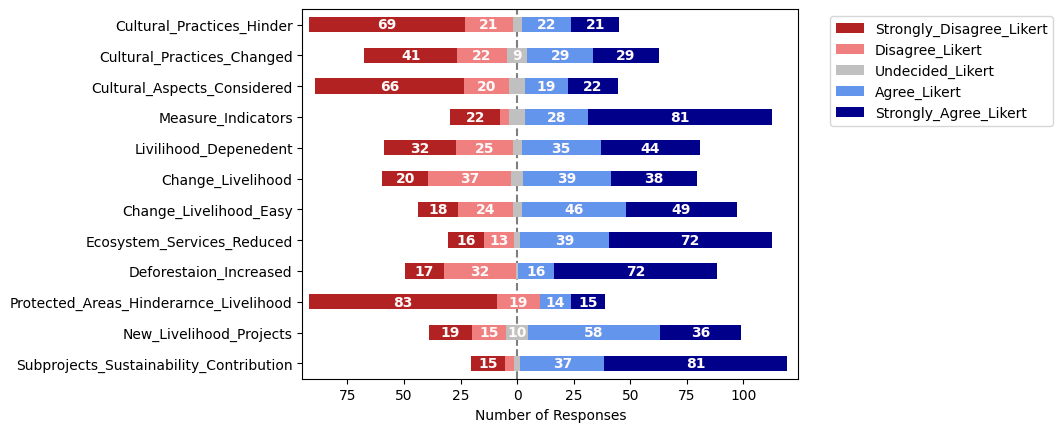

In [310]:
%matplotlib inline
plot_likert.plot_counts(all_counts2, plot_likert.scales.agree,  plot_percentage=False, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.show()

In [311]:
all_counts3 = df3.apply(lambda col: col.value_counts(normalize=True).round(2))

In [312]:
all_counts3 

Cultural_Practices_Hinder  \
Agree_Likert                                   0.16   
Disagree_Likert                                0.15   
Strongly_Agree_Likert                          0.15   
Strongly_Disagree_Likert                       0.50   
Undecided_Likert                               0.03   

                          Cultural_Practices_Changed  \
Agree_Likert                                    0.22   
Disagree_Likert                                 0.17   
Strongly_Agree_Likert                           0.22   
Strongly_Disagree_Likert                        0.32   
Undecided_Likert                                0.07   

                          Cultural_Aspects_Considered  Measure_Indicators  \
Agree_Likert                                     0.14                0.20   
Disagree_Likert                                  0.15                0.03   
Strongly_Agree_Likert                            0.16                0.57   
Strongly_Disagree_Likert                         0.49                0.15   
Undecided_Likert                                 0.05                0.05   

                          Livilihood_Depenedent  Change_Livelihood  \
Agree_Likert                               0.25               0.28   
Disagree_Likert                            0.18               0.27   
Strongly_Agree_Likert                      0.31               0.27   
Strongly_Disagree_Likert                   0.23               0.14   
Undecided_Likert                           0.03               0.04   

                          Change_Livelihood_Easy  Ecosystem_Services_Reduced  \
Agree_Likert                                0.33                        0.27   
Disagree_Likert                             0.17                        0.09   
Strongly_Agree_Likert                       0.35                        0.50   
Strongly_Disagree_Likert                    0.13                        0.11   
Undecided_Likert                            0.03                        0.02   

                          Deforestaion_Increased  \
Agree_Likert                                0.12   
Disagree_Likert                             0.23   
Strongly_Agree_Likert                       0.52   
Strongly_Disagree_Likert                    0.12   
Undecided_Likert                            0.01   

                          Protected_Areas_Hinderarnce_Livelihood  \
Agree_Likert                                                0.11   
Disagree_Likert                                             0.15   
Strongly_Agree_Likert                                       0.11   
Strongly_Disagree_Likert                                    0.63   
Undecided_Likert                                             NaN   

                          New_Livelihood_Projects  \
Agree_Likert                                 0.42   
Disagree_Likert                              0.11   
Strongly_Agree_Likert                        0.26   
Strongly_Disagree_Likert                     0.14   
Undecided_Likert                             0.07   

                          Subprojects_Sustainability_Contribution  
Agree_Likert                                                 0.26  
Disagree_Likert                                              0.03  
Strongly_Agree_Likert                                        0.58  
Strongly_Disagree_Likert                                     0.11  
Undecided_Likert                                             0.02

In [313]:
all_counts4 = all_counts3.head().T

In [314]:
all_counts4

Agree_Likert  Disagree_Likert  \
Cultural_Practices_Hinder                        0.16             0.15   
Cultural_Practices_Changed                       0.22             0.17   
Cultural_Aspects_Considered                      0.14             0.15   
Measure_Indicators                               0.20             0.03   
Livilihood_Depenedent                            0.25             0.18   
Change_Livelihood                                0.28             0.27   
Change_Livelihood_Easy                           0.33             0.17   
Ecosystem_Services_Reduced                       0.27             0.09   
Deforestaion_Increased                           0.12             0.23   
Protected_Areas_Hinderarnce_Livelihood           0.11             0.15   
New_Livelihood_Projects                          0.42             0.11   
Subprojects_Sustainability_Contribution          0.26             0.03   

                                         Strongly_Agree_Likert  \
Cultural_Practices_Hinder                                 0.15   
Cultural_Practices_Changed                                0.22   
Cultural_Aspects_Considered                               0.16   
Measure_Indicators                                        0.57   
Livilihood_Depenedent                                     0.31   
Change_Livelihood                                         0.27   
Change_Livelihood_Easy                                    0.35   
Ecosystem_Services_Reduced                                0.50   
Deforestaion_Increased                                    0.52   
Protected_Areas_Hinderarnce_Livelihood                    0.11   
New_Livelihood_Projects                                   0.26   
Subprojects_Sustainability_Contribution                   0.58   

                                         Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    0.50   
Cultural_Practices_Changed                                   0.32   
Cultural_Aspects_Considered                                  0.49   
Measure_Indicators                                           0.15   
Livilihood_Depenedent                                        0.23   
Change_Livelihood                                            0.14   
Change_Livelihood_Easy                                       0.13   
Ecosystem_Services_Reduced                                   0.11   
Deforestaion_Increased                                       0.12   
Protected_Areas_Hinderarnce_Livelihood                       0.63   
New_Livelihood_Projects                                      0.14   
Subprojects_Sustainability_Contribution                      0.11   

                                         Undecided_Likert  
Cultural_Practices_Hinder                            0.03  
Cultural_Practices_Changed                           0.07  
Cultural_Aspects_Considered                          0.05  
Measure_Indicators                                   0.05  
Livilihood_Depenedent                                0.03  
Change_Livelihood                                    0.04  
Change_Livelihood_Easy                               0.03  
Ecosystem_Services_Reduced                           0.02  
Deforestaion_Increased                               0.01  
Protected_Areas_Hinderarnce_Livelihood                NaN  
New_Livelihood_Projects                              0.07  
Subprojects_Sustainability_Contribution              0.02

In [315]:
all_counts4 

Agree_Likert  Disagree_Likert  \
Cultural_Practices_Hinder                        0.16             0.15   
Cultural_Practices_Changed                       0.22             0.17   
Cultural_Aspects_Considered                      0.14             0.15   
Measure_Indicators                               0.20             0.03   
Livilihood_Depenedent                            0.25             0.18   
Change_Livelihood                                0.28             0.27   
Change_Livelihood_Easy                           0.33             0.17   
Ecosystem_Services_Reduced                       0.27             0.09   
Deforestaion_Increased                           0.12             0.23   
Protected_Areas_Hinderarnce_Livelihood           0.11             0.15   
New_Livelihood_Projects                          0.42             0.11   
Subprojects_Sustainability_Contribution          0.26             0.03   

                                         Strongly_Agree_Likert  \
Cultural_Practices_Hinder                                 0.15   
Cultural_Practices_Changed                                0.22   
Cultural_Aspects_Considered                               0.16   
Measure_Indicators                                        0.57   
Livilihood_Depenedent                                     0.31   
Change_Livelihood                                         0.27   
Change_Livelihood_Easy                                    0.35   
Ecosystem_Services_Reduced                                0.50   
Deforestaion_Increased                                    0.52   
Protected_Areas_Hinderarnce_Livelihood                    0.11   
New_Livelihood_Projects                                   0.26   
Subprojects_Sustainability_Contribution                   0.58   

                                         Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    0.50   
Cultural_Practices_Changed                                   0.32   
Cultural_Aspects_Considered                                  0.49   
Measure_Indicators                                           0.15   
Livilihood_Depenedent                                        0.23   
Change_Livelihood                                            0.14   
Change_Livelihood_Easy                                       0.13   
Ecosystem_Services_Reduced                                   0.11   
Deforestaion_Increased                                       0.12   
Protected_Areas_Hinderarnce_Livelihood                       0.63   
New_Livelihood_Projects                                      0.14   
Subprojects_Sustainability_Contribution                      0.11   

                                         Undecided_Likert  
Cultural_Practices_Hinder                            0.03  
Cultural_Practices_Changed                           0.07  
Cultural_Aspects_Considered                          0.05  
Measure_Indicators                                   0.05  
Livilihood_Depenedent                                0.03  
Change_Livelihood                                    0.04  
Change_Livelihood_Easy                               0.03  
Ecosystem_Services_Reduced                           0.02  
Deforestaion_Increased                               0.01  
Protected_Areas_Hinderarnce_Livelihood                NaN  
New_Livelihood_Projects                              0.07  
Subprojects_Sustainability_Contribution              0.02

In [316]:
all_counts5 = all_counts4.iloc[:, [3, 1, 4, 0, 2]]

In [317]:
all_counts5 

Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    0.50   
Cultural_Practices_Changed                                   0.32   
Cultural_Aspects_Considered                                  0.49   
Measure_Indicators                                           0.15   
Livilihood_Depenedent                                        0.23   
Change_Livelihood                                            0.14   
Change_Livelihood_Easy                                       0.13   
Ecosystem_Services_Reduced                                   0.11   
Deforestaion_Increased                                       0.12   
Protected_Areas_Hinderarnce_Livelihood                       0.63   
New_Livelihood_Projects                                      0.14   
Subprojects_Sustainability_Contribution                      0.11   

                                         Disagree_Likert  Undecided_Likert  \
Cultural_Practices_Hinder                           0.15              0.03   
Cultural_Practices_Changed                          0.17              0.07   
Cultural_Aspects_Considered                         0.15              0.05   
Measure_Indicators                                  0.03              0.05   
Livilihood_Depenedent                               0.18              0.03   
Change_Livelihood                                   0.27              0.04   
Change_Livelihood_Easy                              0.17              0.03   
Ecosystem_Services_Reduced                          0.09              0.02   
Deforestaion_Increased                              0.23              0.01   
Protected_Areas_Hinderarnce_Livelihood              0.15               NaN   
New_Livelihood_Projects                             0.11              0.07   
Subprojects_Sustainability_Contribution             0.03              0.02   

                                         Agree_Likert  Strongly_Agree_Likert  
Cultural_Practices_Hinder                        0.16                   0.15  
Cultural_Practices_Changed                       0.22                   0.22  
Cultural_Aspects_Considered                      0.14                   0.16  
Measure_Indicators                               0.20                   0.57  
Livilihood_Depenedent                            0.25                   0.31  
Change_Livelihood                                0.28                   0.27  
Change_Livelihood_Easy                           0.33                   0.35  
Ecosystem_Services_Reduced                       0.27                   0.50  
Deforestaion_Increased                           0.12                   0.52  
Protected_Areas_Hinderarnce_Livelihood           0.11                   0.11  
New_Livelihood_Projects                          0.42                   0.26  
Subprojects_Sustainability_Contribution          0.26                   0.58

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


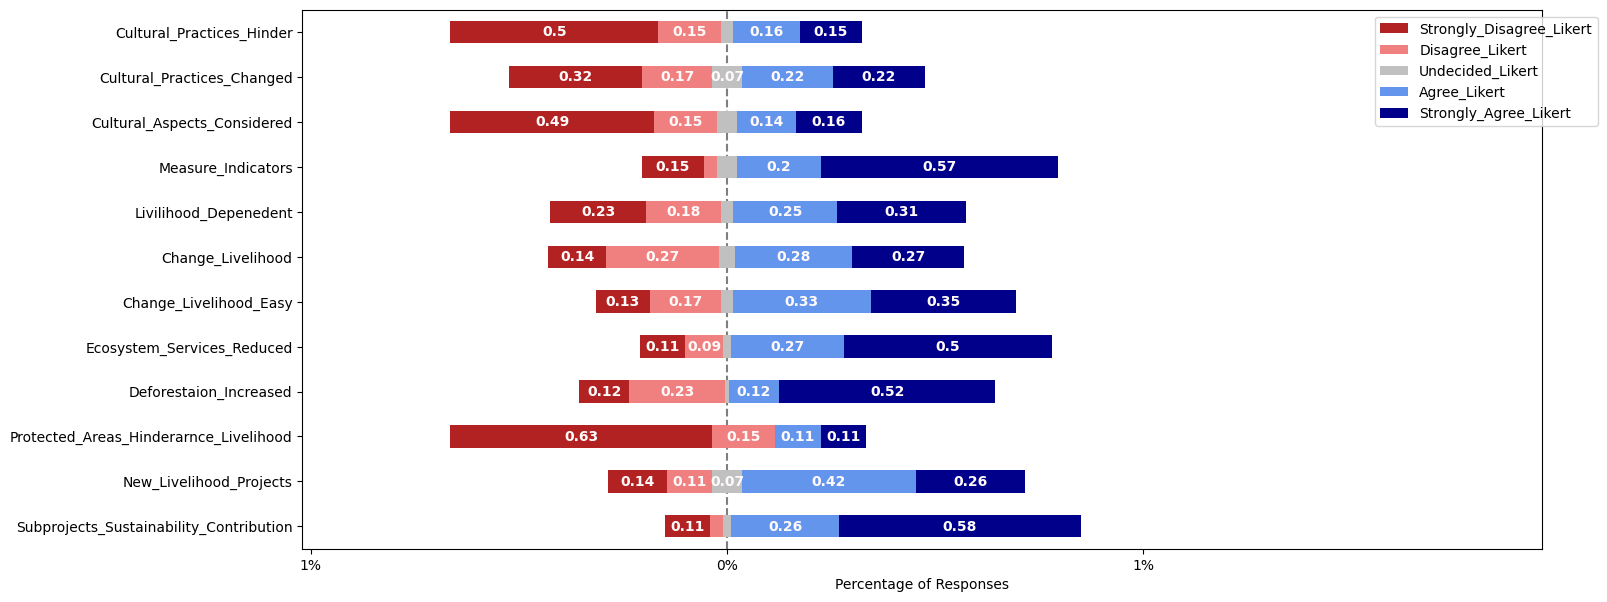

In [318]:
%matplotlib inline
plot_likert.plot_counts(all_counts5, plot_likert.scales.agree,  plot_percentage=True, figsize=(16, 7), bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.show()

OPINIONS

In [319]:
df4=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,28,30,31,32,33,34]], axis = 1)

In [320]:
df4

Purpose_Landscape  \
0                            Nature_Protection_Purpose   
1                            Nature_Protection_Purpose   
2    Nature_Protection_Purpose,Ancestral_Shrines_Pu...   
3                                Source_Income_Purpose   
4                            Nature_Protection_Purpose   
..                                                 ...   
145                                                NaN   
146                          Nature_Protection_Purpose   
147                                                NaN   
148                          Nature_Protection_Purpose   
149                          Nature_Protection_Purpose   

                                     Connection_Nature  \
0         Psychological_Connection,Material_Connection   
1    Philosophical_Connection,Psychological_Connection   
2                              Experiential_Connection   
3                                  Material_Connection   
4    Philosophical_Connection,Psychological_Connection   
..                                                 ...   
145                                                NaN   
146                                Material_Connection   
147                                Material_Connection   
148                                Material_Connection   
149                                Material_Connection   

         Livelihood_Project Contributor_Landscape_Transformation  \
0            3to4Years_Long                      Wood_Extraction   
1    Greaterthan9Years_Long                     Land_Agriculture   
2            5to6Years_Long                      Wood_Extraction   
3    Greaterthan9Years_Long                     Land_Agriculture   
4            5to6Years_Long                     Land_Agriculture   
..                      ...                                  ...   
145                     NaN                                  NaN   
146          3to4Years_Long                      Wood_Extraction   
147          3to4Years_Long                      Wood_Extraction   
148          3to4Years_Long                   Uncontrolled_Fires   
149  Greaterthan9Years_Long                   Uncontrolled_Fires   

                      Landscape_Depended_Livelihood  
0                       Agriculture_Areas_Dependent  
1                                Wetlands_Dependent  
2    Agriculture_Areas_Dependent,Wetlands_Dependent  
3                       Agriculture_Areas_Dependent  
4               Forest_Dependent,Wetlands_Dependent  
..                                              ...  
145                                             NaN  
146                     Agriculture_Areas_Dependent  
147                     Agriculture_Areas_Dependent  
148                     Agriculture_Areas_Dependent  
149                              Wetlands_Dependent  

[150 rows x 5 columns]

In [321]:
print(df4['Purpose_Landscape'].unique())

['Nature_Protection_Purpose'
 'Nature_Protection_Purpose,Ancestral_Shrines_Purpose'
 'Source_Income_Purpose' nan
 'Source_Income_Purpose,Nature_Protection_Purpose'
 'Nature_Protection_Purpose,Source_Income_Purpose'
 'Nature_Protection_Purpose,Other_Purpose'
 'Source_Income_Purpose,Other_Purpose' 'No_Idea_Purpose' 'Other_Purpose']


In [322]:
PL = df4['Purpose_Landscape'].value_counts()

In [323]:
PL

Purpose_Landscape
Nature_Protection_Purpose                              93
Source_Income_Purpose                                  16
Nature_Protection_Purpose,Other_Purpose                 2
Source_Income_Purpose,Nature_Protection_Purpose         1
Nature_Protection_Purpose,Ancestral_Shrines_Purpose     1
Nature_Protection_Purpose,Source_Income_Purpose         1
Source_Income_Purpose,Other_Purpose                     1
No_Idea_Purpose                                         1
Other_Purpose                                           1
Name: count, dtype: int64

In [324]:
df_PL = pd.DataFrame(PL)

In [325]:
df_PL

count
Purpose_Landscape                                        
Nature_Protection_Purpose                              93
Source_Income_Purpose                                  16
Nature_Protection_Purpose,Other_Purpose                 2
Source_Income_Purpose,Nature_Protection_Purpose         1
Nature_Protection_Purpose,Ancestral_Shrines_Pur...      1
Nature_Protection_Purpose,Source_Income_Purpose         1
Source_Income_Purpose,Other_Purpose                     1
No_Idea_Purpose                                         1
Other_Purpose                                           1

In [326]:
df_PL1 = df_PL.head().T

In [327]:
df_PL1

Purpose_Landscape  Nature_Protection_Purpose  Source_Income_Purpose  \
count                                     93                     16   

Purpose_Landscape  Nature_Protection_Purpose,Other_Purpose  \
count                                                    2   

Purpose_Landscape  Source_Income_Purpose,Nature_Protection_Purpose  \
count                                                            1   

Purpose_Landscape  Nature_Protection_Purpose,Ancestral_Shrines_Purpose  
count                                                              1

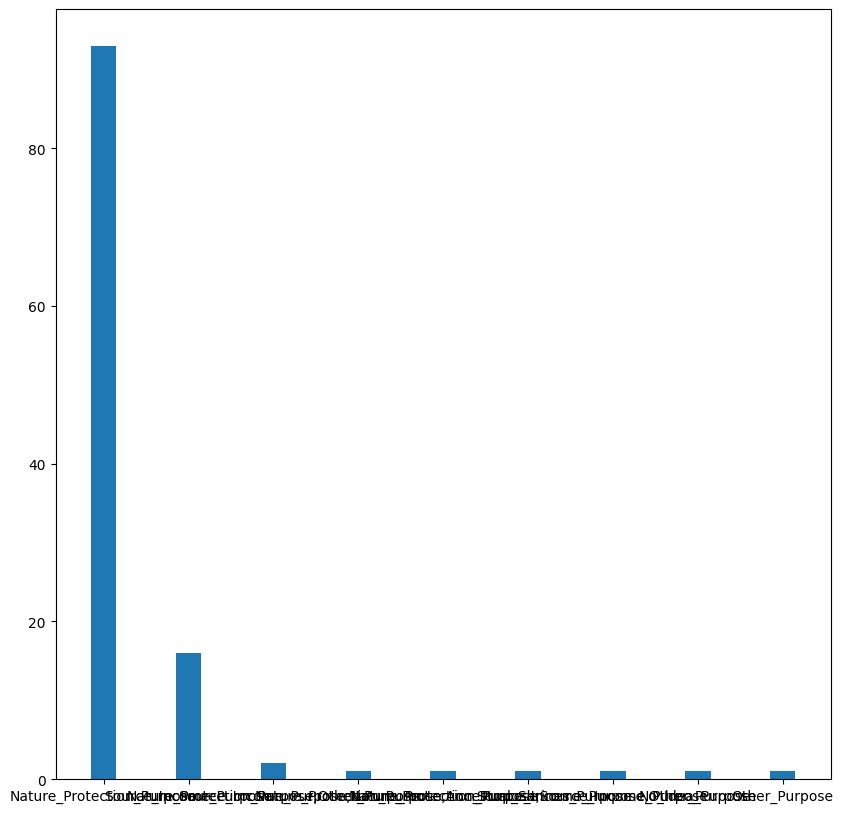

In [328]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(df_PL.index, df_PL["count"], label = "count", width = 0.3)
#ax.bar(df10.index, df10["count"], label = "count", width = 0.3)
plt.show()

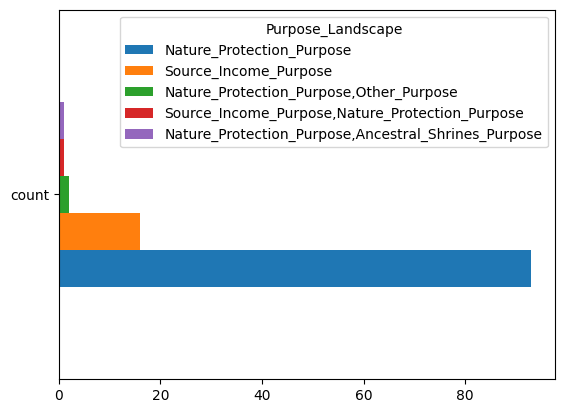

In [329]:
#df_PL1.plot(kind='bar')
df_PL1.plot.barh(stacked = False)
#df_PL.plot.bar(x = "Purpose_Landscape", stacked = False)
#df_PL1.plot.bar(x = "Purpose_Landscape", y = "count")
plt.show()

In [330]:
%matplotlib inline
df_PL.plot(kind='bar', x='Purpose_Landscape', y='count', legend=False)
plt.show()

KeyError: 'Purpose_Landscape'

In [331]:
CN = df4['Connection_Nature'].value_counts()

In [332]:
CN

Connection_Nature
Material_Connection                                  123
Other_Connection                                       6
Experiential_Connection                                2
Philosophical_Connection,Psychological_Connection      2
Psychological_Connection,Material_Connection           1
Psychological_Connection                               1
Philosophical_Connection                               1
Experiential_Connection,Material_Connection            1
Name: count, dtype: int64

In [333]:
LP = df4['Livelihood_Project'].value_counts()

In [334]:
LP

Livelihood_Project
3to4Years_Long            63
5to6Years_Long            50
Lessthan2Years_Long        9
7to8Years_Long             9
Greaterthan9Years_Long     7
Name: count, dtype: int64

In [335]:
CLT = df4['Contributor_Landscape_Transformation'].value_counts()

In [336]:
CLT

Contributor_Landscape_Transformation
Uncontrolled_Fires                     49
Land_Agriculture                       44
Wood_Extraction                        39
Uncontrolled_Grazing                    2
Uncontrolled_Fires,Land_Agriculture     1
Other                                   1
Name: count, dtype: int64

In [337]:
LDL = df4['Landscape_Depended_Livelihood'].value_counts()

In [338]:
LDL

Landscape_Depended_Livelihood
Agriculture_Areas_Dependent                       92
Wetlands_Dependent                                25
Forest_Dependent                                  13
Wetlands_Dependent,Forest_Dependent                4
Agriculture_Areas_Dependent,Wetlands_Dependent     1
Wetlands_Dependent,Agriculture_Areas_Dependent     1
Forest_Dependent,Wetlands_Dependent                1
Name: count, dtype: int64

In [339]:
df5=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis = 1)

In [340]:
df5

Purpose_Landscape_Specific  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4    Only the protection nature the others are not ...   
..                                                 ...   
145                                                NaN   
146                                                NaN   
147                                                NaN   
148                                                NaN   
149                                                NaN   

    Connection_Nature_Specific Contributor_Landscape_Transformation_Specific  \
0                          NaN                                           NaN   
1                          NaN                                           NaN   
2                          NaN                                           NaN   
3                          NaN                                           NaN   
4                          NaN                                           NaN   
..                         ...                                           ...   
145                        NaN                                           NaN   
146                        NaN                                           NaN   
147                        NaN                                           NaN   
148                        NaN                                           NaN   
149                        NaN                                           NaN   

     Landscape_Depended_Livelihood_Specific  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  
..                                      ...  
145                                     NaN  
146                                     NaN  
147                                     NaN  
148                                     NaN  
149                                     NaN  

[150 rows x 4 columns]

In [341]:
df5["Purpose_Landscape_Specific"][0:150]
lemmatizer=WordNetLemmatizer()
for index, row in df5.iterrows():
    filter_sentence = []
    sentence = row["Purpose_Landscape_Specific"]
    sentence = re.sub(r'[^\w\s]','',sentence)
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)

TypeError: expected string or bytes-like object, got 'float'

In [342]:
df6=df2.drop(df2.columns[[0,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)

In [343]:
df6

Ward_Name                          Sub_Project_name  \
0    Isamba ward                        Isamba coperatives   
1    Isamba ward  Misenga cooperative multipurpose society   
2        Isamba                          Ninge Cooperative   
3    Isamba ward                    Twikatene copperatives   
4    Isamba ward                      Changwena women club   
..           ...                                       ...   
145         Yeta                                       NaN   
146        Yeta                                    Biochar   
147         Yeta                                   Biochar   
148         Yeta                                  B iochar   
149    Yeta ward          Piggery, fishponds and gardening   

                                            Livelihood  \
0                                         Goat rearing   
1                 Goat rearing, Gardening, Fruit trees   
2                     Goat Rearing, Agricuture-cassava   
3    Goat rearing and Fish farming and garden of ve...   
4                     Chicken rearing ablnd an orchard   
..                                                 ...   
145                                            Biochar   
146                                          Gardening   
147                                          Gardening   
148                                        Gardenning    
149               Fish ponds and piggery and gerdening   

                       Size             Name_Main_Project Representing_Others  \
0            8to12Lima_Size                   TRALARD_LNM                 yes   
1    Greaterthan16Lima_Size                   TRALARD_LNM                 yes   
2    Greaterthan16Lima_Size                   TRALARD_LNM                 yes   
3    Greaterthan16Lima_Size                   TRALARD_LNM                 yes   
4        Lessthan4Lima_Size                   TRALARD_LNM                 NaN   
..                      ...                           ...                 ...   
145                     NaN  EbA_CENTRAL_MUCHINGA_LUAPULA                 NaN   
146      Lessthan4Lima_Size                   PIN_WESTERN                  no   
147      Lessthan4Lima_Size                   PIN_WESTERN                  no   
148          8to12Lima_Size                   PIN_WESTERN                  no   
149      Lessthan4Lima_Size                SCReBS_WESTERN                 yes   

         Number_Beneficiaries  
0    Greaterthan40People_Many  
1    Greaterthan40People_Many  
2    Greaterthan40People_Many  
3    Greaterthan40People_Many  
4           20to30People_Many  
..                        ...  
145                       NaN  
146                       NaN  
147                       NaN  
148                       NaN  
149         10to20People_Many  

[150 rows x 7 columns]

In [344]:
MP = df6['Name_Main_Project'].value_counts()

In [345]:
MP

Name_Main_Project
SCRiKA_LS                               41
TRALARD_LNM                             40
SCRALA_SOUTHERN_WESTERN_NORTHEN         29
SCReBS_WESTERN                          16
Ecosystem Conservation_NORTH_WESTERN     9
PIN_WESTERN                              5
EbA_CENTRAL_MUCHINGA_LUAPULA             4
Sustainable Luangwa_MAFINGA_DISTRICT     2
ZIFLP_EASTERN                            1
Name: count, dtype: int64

REASONS

In [346]:
df7=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,10,11,13,14,15,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34]], axis = 1)

In [347]:
df7

Cultural_Practices_Hinder_Reason  \
0          It has never happed before in his life time   
1    There is need to harvest tree when they have f...   
2    There are no customary practices that hinder s...   
3    There are rotations made on the land when cult...   
4                                     There is nothing   
..                                                 ...   
145                                                NaN   
146                                   There is nothing   
147                                    There is nthing   
148                                   There is nothing   
149                                   There is nothing   

                   Cultural_Aspects_Considered_Reasons  \
0            There are no cultural history in the area   
1    There is need to have power in what he formula...   
2                      There are nop cultural aspects    
3    At the time of getting the land for the projec...   
4    We only follow what the chiefs and the governm...   
..                                                 ...   
145                                                NaN   
146  Only the indunas that send tye representative ...   
147                                   There is nothing   
148                                   There is nothing   
149                                    We do not do it   

                             Connection_Nature_Reasons  \
0    The animals can be used by the future general ...   
1    How the animals they lead thems we can get exa...   
2    Through experiments he gains nkowledge on the ...   
3                       To use some of them for income   
4    They are important in our lifes like trees the...   
..                                                 ...   
145                                                NaN   
146                                                NaN   
147                                                NaN   
148                                                NaN   
149                                                NaN   

                        Change_Livelihood_Easy_Reasons  \
0    If the SES are taken care of they can increase...   
1    The SeS can be depleted thus there need to cha...   
2    Change is easier because he is the one who has...   
3                  Because my livelihood would improve   
4    There has been thongs like climate change affe...   
..                                                 ...   
145                                                NaN   
146  The perwon can make a deciosn through lookig b...   
147                     As long as you aare commiteted   
148  It is diffi jlt but as long as uou follow whag...   
149            As long sa i have the capacity to do so   

          Contributor_Landscape_Transformation_Reasons  \
0    The trees have been depleted and it has caused...   
1    Because i have to clear the land gor agricultu...   
2    There would a reduction in the number of trees...   
3    Because it requires a huge land than the other...   
4    Because people cut down tree for farmimg but t...   
..                                                 ...   
145                                                NaN   
146  They use chitemen system of just cuttingbtrees...   
147  The trees and cut and make charcoal the do bno...   
148                   It distroys everythin on it ways   
149                 It diatroys everything on its path   

                Landscape_Depeneded_Livelihood_Reasons  
0    He caltivates a large area of land so that som...  
1    Tje killing of fish is the source of income in...  
2    He depends much on agriculture the most than f...  
3    Food is the main source of livelihood thus wit...  
4     The water is used for gardening and other things  
..                                                 ...  
145                                                NaN  
146                                         We farmers  
147                  Tha

In [348]:
CPHR=df7["Cultural_Practices_Hinder_Reason"].tolist()

In [349]:
CPHR

['It has never happed before in his life time',
 'There is need to harvest tree when they have fully grown the same applies to biodiversity',
 'There are no customary practices that hinder sustainable management',
 'There are rotations made on the land when cultivation to ensure fetility of soil',
 'There is nothing',
 'There is nothing',
 'Therevis nothing',
 'You are allowed to cultivate an area for 3 years before shifting yo another area',
 'There is nothing',
 'There is nothing',
 'There are no cultural history within the community e cept the from the governmnet',
 'There rules from the chiefs who ensurex the harvesting period are followed as well as the periond vor burining the bush',
 'There is a norms of the period when the bush has to be be burt sothe the bush is not completely burnt',
 'There are  cultural norms',
 'There is nothing',
 'There is nothing',
 'Threr is nothing',
 'There is nothing',
 'There are cusyomsry practices that protect thr environment like Zawa protect th

In [350]:
len(df7["Cultural_Practices_Hinder_Reason"])

150

In [351]:
len(set(df7["Cultural_Practices_Hinder_Reason"]))

78

In [352]:
FreqDist(CPHR)

FreqDist({'There is nothing': 49, nan: 18, 'Tgere is nothing': 3, 'Therevis nothing': 2, 'Threr is nothing': 2, 'Tehre is nothing': 2, 'Thee is nothing': 2, 'There 8s nothing': 2, 'It has never happed before in his life time': 1, 'There is need to harvest tree when they have fully grown the same applies to biodiversity': 1, ...})

In [353]:
stop_words = stopwords.words ("English")

In [354]:
df7["Cultural_Practices_Hinder_Reason"][0:150]
lemmatizer=WordNetLemmatizer()
for index, row in df7.iterrows():
    filter_sentence = []
    sentence = row["Cultural_Practices_Hinder_Reason"]
    sentence = re.sub(r'[^\w\s]','',sentence)
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)
    #df2.loc[index, "Cultural_Practices_Hinder_Reason"] = filter_sentence    

['It', 'never', 'happed', 'life', 'time']
['There', 'need', 'harvest', 'tree', 'fully', 'grown', 'applies', 'biodiversity']
['There', 'customary', 'practice', 'hinder', 'sustainable', 'management']
['There', 'rotation', 'made', 'land', 'cultivation', 'ensure', 'fetility', 'soil']
['There', 'nothing']
['There', 'nothing']
['Therevis', 'nothing']
['You', 'allowed', 'cultivate', 'area', '3', 'year', 'shifting', 'yo', 'another', 'area']
['There', 'nothing']
['There', 'nothing']
['There', 'cultural', 'history', 'within', 'community', 'e', 'cept', 'governmnet']
['There', 'rule', 'chief', 'ensurex', 'harvesting', 'period', 'followed', 'well', 'periond', 'vor', 'burining', 'bush']
['There', 'norm', 'period', 'bush', 'burt', 'sothe', 'bush', 'completely', 'burnt']
['There', 'cultural', 'norm']
['There', 'nothing']
['There', 'nothing']
['Threr', 'nothing']
['There', 'nothing']
['There', 'cusyomsry', 'practice', 'protect', 'thr', 'environment', 'like', 'Zawa', 'protect', 'thr', 'biofiversiyy']
['

TypeError: expected string or bytes-like object, got 'float'

SPECIFIC VARIABLES

In [355]:
#df10 = df2.groupby(['Name_Main_Project'], as_index = False)[['Cultural_Practices_Hinder',"Cultural_Practices_Changed"]].value_counts (normalize =True).mul(100).round(2)
grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Hinder'].value_counts()

In [356]:
grouped

Name_Main_Project                     Cultural_Practices_Hinder
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert         2
                                      Strongly_Disagree_Likert      1
Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert      4
                                      Agree_Likert                  1
                                      Disagree_Likert               1
                                      Strongly_Agree_Likert         1
PIN_WESTERN                           Strongly_Disagree_Likert      5
SCRALA_SOUTHERN_WESTERN_NORTHEN       Disagree_Likert              11
                                      Strongly_Disagree_Likert      8
                                      Agree_Likert                  5
                                      Strongly_Agree_Likert         2
                                      Undecided_Likert              2
SCReBS_WESTERN                        Strongly_Disagree_Likert     15
                          

In [358]:
grouped1 = pd.DataFrame(grouped)

In [359]:
grouped1

count
Name_Main_Project                    Cultural_Practices_Hinder       
EbA_CENTRAL_MUCHINGA_LUAPULA         Strongly_Agree_Likert          2
                                     Strongly_Disagree_Likert       1
Ecosystem Conservation_NORTH_WESTERN Strongly_Disagree_Likert       4
                                     Agree_Likert                   1
                                     Disagree_Likert                1
                                     Strongly_Agree_Likert          1
PIN_WESTERN                          Strongly_Disagree_Likert       5
SCRALA_SOUTHERN_WESTERN_NORTHEN      Disagree_Likert               11
                                     Strongly_Disagree_Likert       8
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          2
                                     Undecided_Likert               2
SCReBS_WESTERN                       Strongly_Disagree_Likert      15
                                     Agree_Likert                   1
SCRiKA_LS                            Strongly_Disagree_Likert      18
                                     Disagree_Likert                6
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          5
                                     Undecided_Likert               2
Sustainable Luangwa_MAFINGA_DISTRICT Strongly_Agree_Likert          1
                                     Strongly_Disagree_Likert       1
TRALARD_LNM                          Strongly_Disagree_Likert      15
                                     Agree_Likert                  10
                                     Strongly_Agree_Likert         10
                                     Disagree_Likert                3
ZIFLP_EASTERN                        Strongly_Disagree_Likert       1

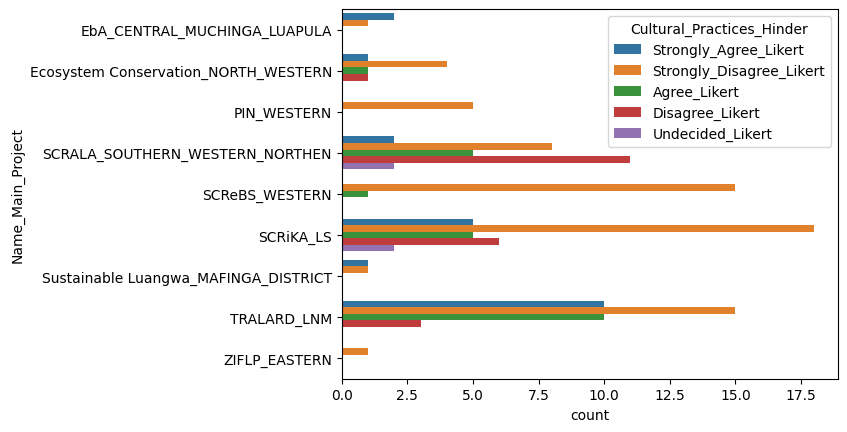

In [374]:
sns.barplot(data = grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Hinder", legend=True)
plt.show()

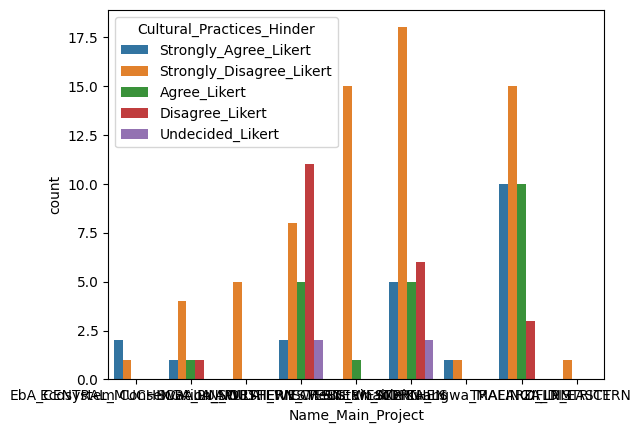

In [373]:
sns.barplot(data = grouped1, x="Name_Main_Project", y="count", hue="Cultural_Practices_Hinder", legend=True)
plt.show()

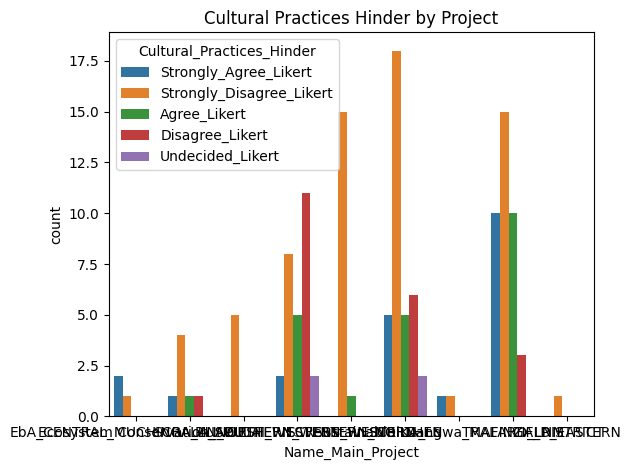

In [369]:
sns.barplot(
    data = grouped1,
    x='Name_Main_Project',
    y='count',
    hue='Cultural_Practices_Hinder')
plt.title('Cultural Practices Hinder by Project')
plt.tight_layout()
plt.show()

In [274]:
df10

Name_Main_Project  \
0   EbA_CENTRAL_MUCHINGA_LUAPULAEbA_CENTRAL_MUCHIN...   
1   EbA_CENTRAL_MUCHINGA_LUAPULAEbA_CENTRAL_MUCHIN...   
2   EbA_CENTRAL_MUCHINGA_LUAPULAEbA_CENTRAL_MUCHIN...   
3   Ecosystem Conservation_NORTH_WESTERNEcosystem ...   
4   Ecosystem Conservation_NORTH_WESTERNEcosystem ...   
5   PIN_WESTERNPIN_WESTERNPIN_WESTERNPIN_WESTERNPI...   
6   PIN_WESTERNPIN_WESTERNPIN_WESTERNPIN_WESTERNPI...   
7   SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
8   SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
9   SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
10  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
11  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
12  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
13  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
14  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
15  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
16  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
17  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
18  SCRALA_SOUTHERN_WESTERN_NORTHENSCRALA_SOUTHERN...   
19  SCReBS_WESTERNSCReBS_WESTERNSCReBS_WESTERNSCRe...   
20  SCReBS_WESTERNSCReBS_WESTERNSCReBS_WESTERNSCRe...   
21  SCReBS_WESTERNSCReBS_WESTERNSCReBS_WESTERNSCRe...   
22  SCReBS_WESTERNSCReBS_WESTERNSCReBS_WESTERNSCRe...   
23  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
24  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
25  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
26  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
27  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
28  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
29  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
30  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
31  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
32  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
33  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
34  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
35  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
36  SCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSSCRiKA_LSS...   
37  Sustainable Luangwa_MAFINGA_DISTRICTSustainabl...   
38  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
39  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
40  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
41  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
42  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
43  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
44  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
45  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
46  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
47  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
48  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
49  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
50  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
51  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
52  TRALARD_LNMTRALARD_LNMTRALARD_LNMTRALARD_LNMTR...   
53  ZIFLP_EASTERNZIFLP_EASTERNZIFLP_EASTERNZIFLP_E...   

                            Cultural_Practices_Hinder  \
0   Strongly_Agree_LikertStrongly_Agree_LikertStro...   
1   Strongly_Agree_LikertStrongly_Agree_LikertStro...   
2   Strongly_Disagree_LikertStrongly_Disagree_Like...   
3   Strongly_Disagree_LikertStrongly_Disagree_Like...   
4   Strongly_Disagree_LikertStrongly_Disagree_Like...   
5   Strongly_Disagree_LikertStrongly_Disagree_Like...   
6   Strongly_Disagree_LikertStrongly_Disagree_Like...   
7   Disagree_LikertDisagree_LikertDisagree_LikertD...   
8   Agree_LikertAgree_LikertAgree_LikertAgree_Like...   
9   Strongly_Disagree_LikertStrongly_Disagree_Like...   
10  Strongly_Disagree_LikertStrongly_Disagree_Like...   
11  Disagree_LikertDisagree_LikertDisagree_LikertD...   
12  Agree_LikertAgree_LikertAgree_LikertAgree_Like...   
13  Disagree_LikertDisagree_LikertDisagree_LikertD...   
14  Strongly_Agree_LikertStrongly_Agree_Liker

In [251]:
%matplotlib inline
pivot_table = df10.pivot(index='Name_Main_Project', columns='Cultural_Practices_Hinder', values='proportion')
pivot_table.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.show()

MemoryError: In RendererAgg: Out of memory

<Figure size 800x500 with 1 Axes>

In [237]:
%matplotlib inline

In [252]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(df10.index, df10["count"], label = "count", width = 0.3)
#ax.bar(df10.index, df10["count"], label = "count", width = 0.3)
plt.show()

KeyError: 'count'

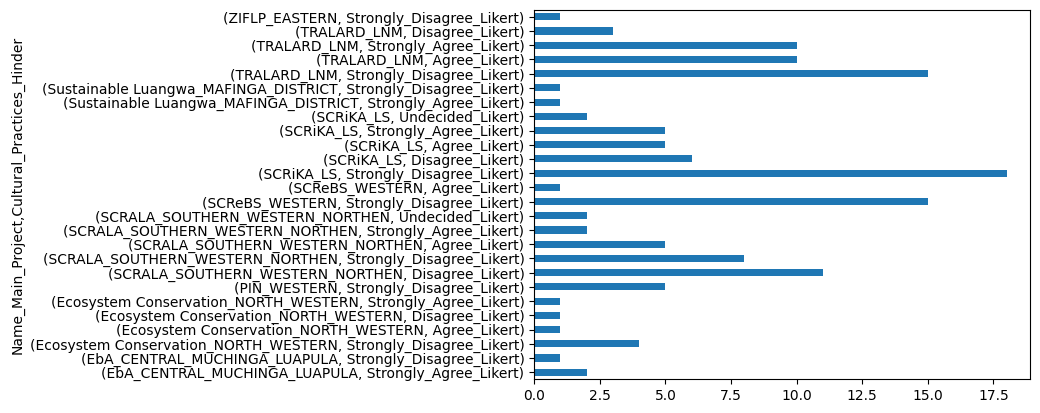

In [256]:
%matplotlib inline
df2.groupby(['Name_Main_Project'], as_index = True)[['Cultural_Practices_Hinder']].value_counts().plot(kind = 'barh')
plt.show()

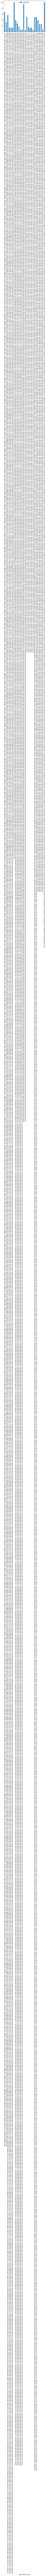

In [250]:
df10.plot(x='Name_Main_Project', y='proportion', kind='bar')
plt.show()

In [276]:
 df20 = df2[['Name_Main_Project','Cultural_Practices_Hinder','Subprojects_Sustainability_Contribution']]

In [277]:
all_count = df20.apply(pd.Series.value_counts)

In [278]:
all_count

Name_Main_Project  \
Agree_Likert                                        NaN   
Disagree_Likert                                     NaN   
EbA_CENTRAL_MUCHINGA_LUAPULA                        4.0   
Ecosystem Conservation_NORTH_WESTERN                9.0   
PIN_WESTERN                                         5.0   
SCRALA_SOUTHERN_WESTERN_NORTHEN                    29.0   
SCReBS_WESTERN                                     16.0   
SCRiKA_LS                                          41.0   
Strongly_Agree_Likert                               NaN   
Strongly_Disagree_Likert                            NaN   
Sustainable Luangwa_MAFINGA_DISTRICT                2.0   
TRALARD_LNM                                        40.0   
Undecided_Likert                                    NaN   
ZIFLP_EASTERN                                       1.0   

                                      Cultural_Practices_Hinder  \
Agree_Likert                                               22.0   
Disagree_Likert                                            21.0   
EbA_CENTRAL_MUCHINGA_LUAPULA                                NaN   
Ecosystem Conservation_NORTH_WESTERN                        NaN   
PIN_WESTERN                                                 NaN   
SCRALA_SOUTHERN_WESTERN_NORTHEN                             NaN   
SCReBS_WESTERN                                              NaN   
SCRiKA_LS                                                   NaN   
Strongly_Agree_Likert                                      21.0   
Strongly_Disagree_Likert                                   69.0   
Sustainable Luangwa_MAFINGA_DISTRICT                        NaN   
TRALARD_LNM                                                 NaN   
Undecided_Likert                                            4.0   
ZIFLP_EASTERN                                               NaN   

                                      Subprojects_Sustainability_Contribution  
Agree_Likert                                                             37.0  
Disagree_Likert                                                           4.0  
EbA_CENTRAL_MUCHINGA_LUAPULA                                              NaN  
Ecosystem Conservation_NORTH_WESTERN                                      NaN  
PIN_WESTERN                                                               NaN  
SCRALA_SOUTHERN_WESTERN_NORTHEN                                           NaN  
SCReBS_WESTERN                                                            NaN  
SCRiKA_LS                                                                 NaN  
Strongly_Agree_Likert                                                    81.0  
Strongly_Disagree_Likert                                                 15.0  
Sustainable Luangwa_MAFINGA_DISTRICT                                      NaN  
TRALARD_LNM                                                               NaN  
Undecided_Likert                                                          3.0  
ZIFLP_EASTERN                                                             NaN